Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

# 1. Аналитика

In [26]:
query_1 = pd.read_csv('/datasets/query_1.csv')

In [27]:
query_3 = pd.read_csv('/datasets/query_3.csv')

In [28]:
query_last = pd.read_csv('/datasets/query_last.csv')

In [29]:
query_1.head(30)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [30]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Данные таблице query_1 корректны.

In [31]:
query_3.head(40)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


In [32]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [33]:
query_3.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Данные таблице query_3 корректны.

In [34]:
query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [35]:
query_last.head(10)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Данные таблице query_last имеют пропущенные значения для названия фестиваля и его недели. Для нас это означает, что фестиваль просто отсутствовал.

Добавим колонку, показывающую наличие (1) или отсутсвие фестиваля(0).

In [36]:
def festival_present(week):
    if week > 0:
        return 1
    else:
        return 0

In [37]:
query_last['festival'] = query_last['festival_week'].apply(festival_present)

In [38]:
query_last.sort_values(by = "ticket_amount" ).head(10)

,week_number,ticket_amount,festival_week,festival_name,festival
0,30,43568,30.0,Park Live,1
1,31,51034,31.0,Пикник Афиши,1
5,35,51360,NaN,NaN,0
3,33,51378,NaN,NaN,0
6,36,51386,36.0,Видфест,1
4,34,51492,NaN,NaN,0
8,38,51518,NaN,NaN,0
9,39,51623,NaN,NaN,0
7,37,51670,NaN,NaN,0
2,32,51675,NaN,NaN,0


In [39]:
query_last.describe()

,week_number,ticket_amount,festival_week,festival
count,10.00000,10.000000,3.000000,10.000000
mean,34.50000,50670.400000,32.333333,0.300000
std,3.02765,2502.752716,3.214550,0.483046
min,30.00000,43568.000000,30.000000,0.000000
25%,32.25000,51364.500000,30.500000,0.000000
50%,34.50000,51439.000000,31.000000,0.000000
75%,36.75000,51596.750000,33.500000,0.750000
max,39.00000,51675.000000,36.000000,1.000000


In [40]:
top_cities = query_3.sort_values(by = 'average_flights', ascending = False).head(10)
print(top_cities )

               city  average_flights
43           Москва       129.774194
70  Санкт-Петербург        31.161290
54      Новосибирск        17.322581
33       Красноярск        11.580645
20     Екатеринбург        11.322581
67   Ростов-на-Дону        10.193548
63            Пермь        10.129032
10           Брянск        10.000000
74             Сочи         9.612903
84        Ульяновск         9.580645


В топ-10 городов по количеству полетов (по убыванию):
Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск.

Строим графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов.

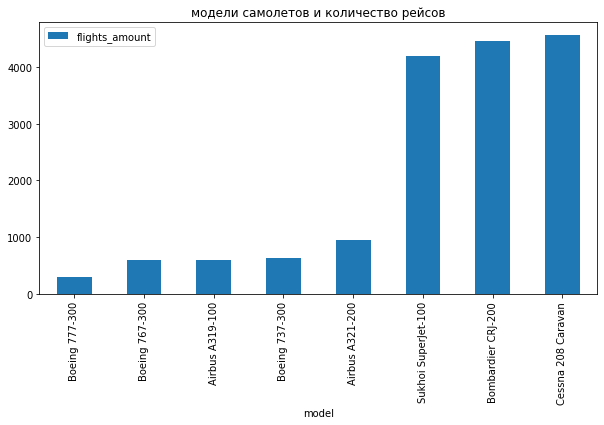

In [41]:
query_1.sort_values(by = 'flights_amount').plot(y='flights_amount', x='model', kind = 'bar') 
plt.xticks(rotation=90)
plt.title('модели самолетов и количество рейсов')
plt.show()

Видим, что полетов на Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100 в несколько раз больше, чем на других моделях.

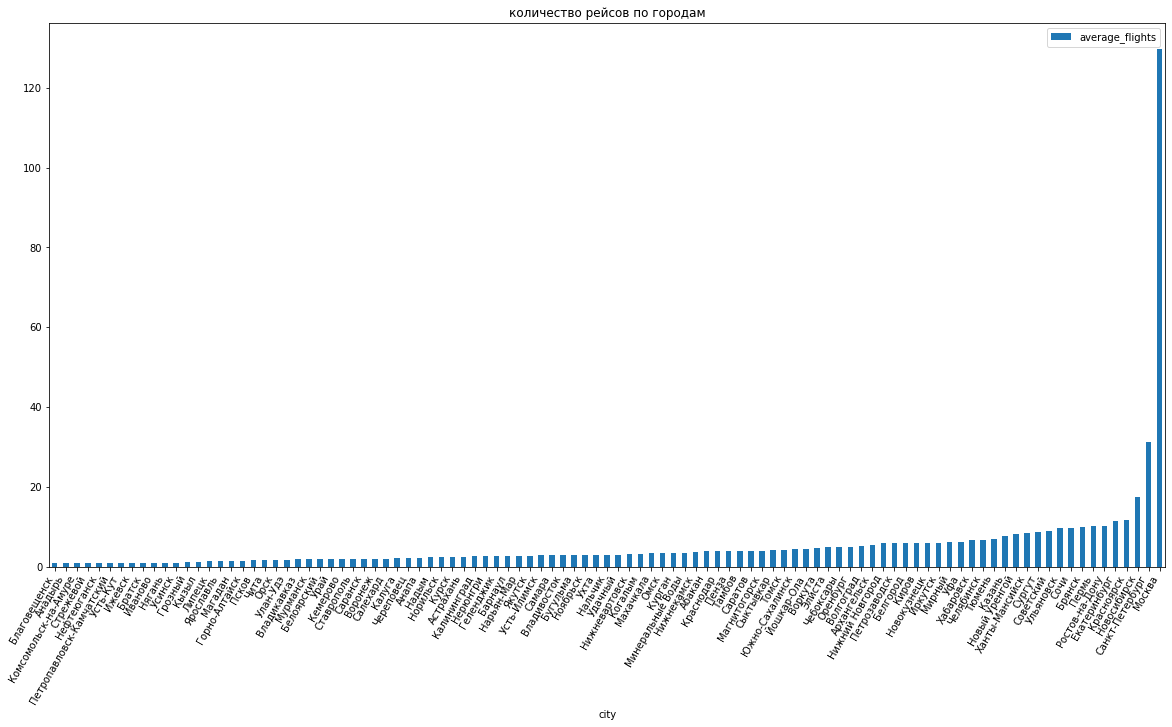

In [42]:
plt.rcParams['figure.figsize']=(20,10)
query_3.sort_values(by = 'average_flights').plot(y='average_flights', x='city', kind = 'bar')
plt.xticks(rotation=60, horizontalalignment= 'right')
plt.title('количество рейсов по городам')
plt.show()

Видим огромную, на порядки разбежку вполетах большинства городов с Москвой. Для болле точной картины можно взглянуть на график топ-10 городов по количеству полетов.

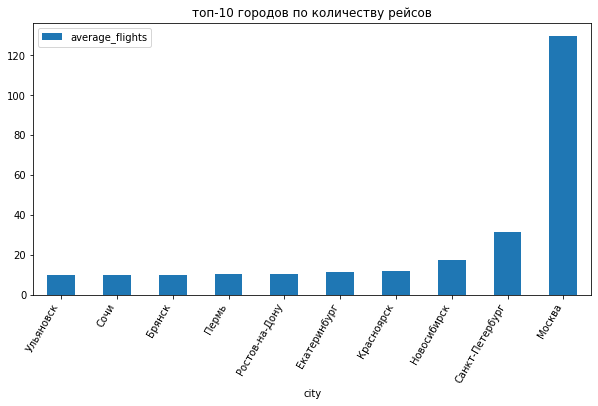

In [43]:
plt.rcParams['figure.figsize']=(10,5)
top_cities.sort_values(by = 'average_flights').plot(y='average_flights', x='city', kind = 'bar')
plt.xticks(rotation=60, horizontalalignment= 'right')
plt.title('топ-10 городов по количеству рейсов')
plt.show()

Даже на графике для топ-10 разбежка с Москвой составляем минимум в три раза.

# 2. Проверка гипотезы

Проверяем гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время» (нулевая гипотеза должна формироваться со знаком равенства).

Т.к. количественных данных немного, сравниваем две независимые группы, используем Т-критерий Стьюдента.

Чтобы проверить гипотезу о равенстве среднего двух независимых генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var) .

Альтернативную гипотезу сформулируем так: "Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время" (будет принята, если удастся опровергнуть альтернативную гипотезу). Дисперсии выборок считаем примерно равными.

In [44]:
tickets_festival = query_last['ticket_amount'].loc[query_last['festival'] == 1] # разделяем на выботки по наличию фестивалей
tickets_nofestival = query_last['ticket_amount'].loc[query_last['festival'] == 0]

In [45]:
tickets_festival

0    43568
1    51034
6    51386
Name: ticket_amount, dtype: int64

In [46]:
tickets_nofestival

2    51675
3    51378
4    51492
5    51360
7    51670
8    51518
9    51623
Name: ticket_amount, dtype: int64

In [47]:
alpha = .05 # Пороговое значение alpha задаем 0.05 - стандартный вариант для уровня значимости 5%.
results = st.ttest_ind(tickets_festival, tickets_nofestival, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время")

p-значение: 0.377432493172683
Не получилось отвергнуть нулевую гипотезу. Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время


# Вывод
В ходе проделаной работы были изучены базы данных и проанализирован спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

Во всех базах типы данных были корректными.

В топ-10 городов по количеству полетов (по убыванию): Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск.

Из построенных графиков(модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов) можно было увидеть,что 
    - полетов на Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100 в несколько раз больше, чем на других моделях
    - присутсвует огромная, на порядки разбежка в полетах в большинство городов по сравнению с Москвой
    - даже на графике для топ-10 разбежка с Москвой составляем минимум в три раза

Была проверена гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время» (нулевая гипотеза должна формироваться со знаком равенства).
Чтобы проверить гипотезу о равенстве среднего двух независимых генеральных совокупностей по взятым из них выборкам, применяли метод scipy.stats.ttest_ind (array1, array2, equal_var).

Получили p-значение: 0.377432493172683.
Не получилось отвергнуть нулевую гипотезу. Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время.

# Рекомендации для авиакомпании F9
в топ-10 предпочтения пользователей (по убыванию): Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск с огромным преимуществом у Москвы. Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время, поэтому на график проведения фестивалей не нужно ориентироваться при планирований спроса на внутренние пассажирские перевозки.